In [4]:
import re
import random
import math
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [5]:
with open("/content/TheOdyssey.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [6]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = text.split()
    return tokens

In [7]:
tokens = preprocess(text)
print("Количество токенов:", len(tokens))
print("Пример токенов:", tokens[:20])


Количество токенов: 121105
Пример токенов: ['the', 'odyssey', 'by', 'homer', 'preface', 'to', 'first', 'edition', 'this', 'translation', 'is', 'intended', 'to', 'supplement', 'a', 'work', 'entitled', 'the', 'authoress', 'of']


In [8]:
def build_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

In [9]:
class NGramModel:
    def __init__(self, n):
        self.n = n
        self.ngram_counts = defaultdict(Counter)
        self.context_counts = Counter()

    def train(self, tokens):
        ngrams = build_ngrams(tokens, self.n)
        for ng in ngrams:
            context = ng[:-1]
            word = ng[-1]
            self.ngram_counts[context][word] += 1
            self.context_counts[context] += 1

    def probability(self, word, context, vocab_size):
        # Сглаживание Лапласа
        word_count = self.ngram_counts[context][word]
        context_count = self.context_counts[context]
        return (word_count + 1) / (context_count + vocab_size)

    def perplexity(self, tokens, vocab_size):
        ngrams = build_ngrams(tokens, self.n)
        log_prob = 0
        for ng in ngrams:
            context = ng[:-1]
            word = ng[-1]
            prob = self.probability(word, context, vocab_size)
            log_prob += math.log(prob)
        return math.exp(-log_prob / len(ngrams))

    def generate(self, start_context, length=20):
        context = list(start_context)
        result = context.copy()

        for _ in range(length):
            context_tuple = tuple(context)
            if context_tuple not in self.ngram_counts:
                break

            words, weights = zip(*self.ngram_counts[context_tuple].items())
            next_word = random.choices(words, weights=weights)[0]

            result.append(next_word)
            context = result[-(self.n - 1):]

        return " ".join(result)

In [10]:
n = 3  # Триграммы
model = NGramModel(n)
model.train(tokens)

vocab_size = len(set(tokens))
print("Размер словаря:", vocab_size)

pp = model.perplexity(tokens, vocab_size)
print(f"Перплексия для {n}-граммной модели:", pp)


Размер словаря: 6655
Перплексия для 3-граммной модели: 2486.9060380815067


In [11]:
start_context = tokens[:n-1]
generated_text = model.generate(start_context, length=30)

print("\nСгенерированный текст:")
print(generated_text)


Сгенерированный текст:
the odyssey with the guests sitting orderly to listen to what is after all for now at last he reached after running away from him leaving his spear and your assistance i


2-gram model, perplexity = 958.081
3-gram model, perplexity = 2486.906
4-gram model, perplexity = 3041.624
5-gram model, perplexity = 3178.964


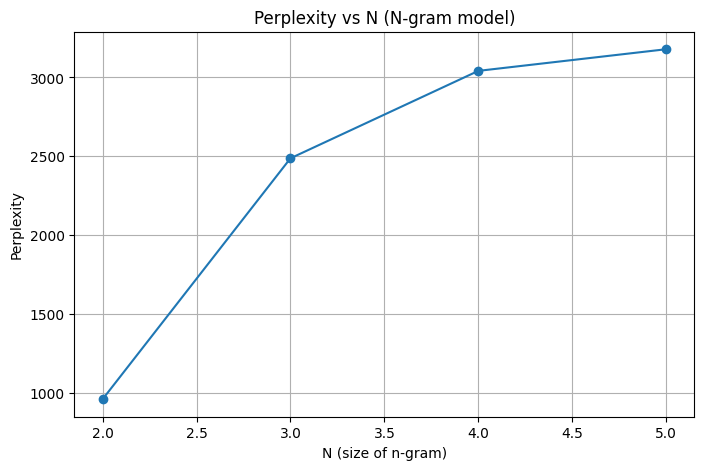

In [12]:
def evaluate_ngram(n):
    model = NGramModel(n)
    model.train(tokens)
    vocab_size = len(set(tokens))
    return model.perplexity(tokens, vocab_size)

ns = [2, 3, 4, 5]
perplexities = []

for n in ns:
    pp = evaluate_ngram(n)
    perplexities.append(pp)
    print(f"{n}-gram model, perplexity = {pp:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(ns, perplexities, marker="o")
plt.title("Perplexity vs N (N-gram model)")
plt.xlabel("N (size of n-gram)")
plt.ylabel("Perplexity")
plt.grid(True)
plt.show()

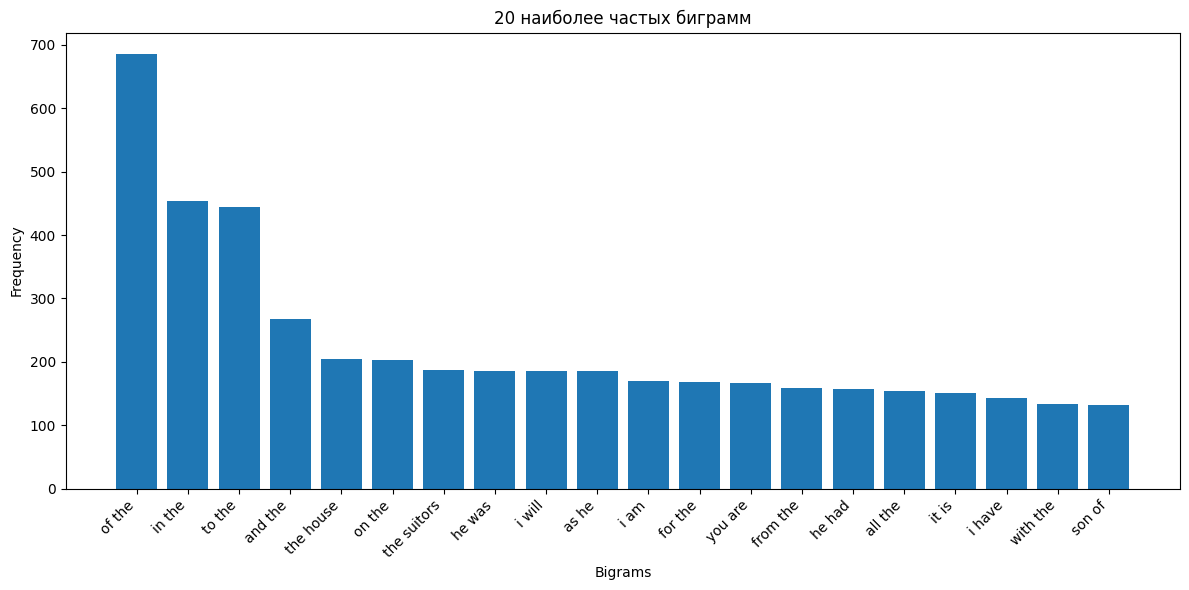

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
def build_bigrams(tokens):
    bigrams = []
    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i+1]))
    return bigrams

bigrams = build_bigrams(tokens)


# Подсчёт частот
bigram_counts = Counter(bigrams)

top_n = 20
top_bigrams = bigram_counts.most_common(top_n)

labels = [" ".join(b) for b, _ in top_bigrams]
values = [count for _, count in top_bigrams]

plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.title("20 наиболее частых биграмм")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
